# 고전적 랜덤워크
- dt 내에서 움직일 확률은 dt (포아송 분포)
- 왼쪽, 오른쪽 1/2 확률로 이동할 수 있음
- $ H=blablabla $로 정의하면
- t+dt 일 때 분포는 $ P_{t+dt} = dt HP_{t} + (1-dt)P_{t}$ 로 쓸 수 있음.
- 해를 구하면 $\frac{d}{dt} P_t = (H-I)P_t$

- $P_t(x)$를 푸리에 변환하면, 
$$P_t(x)=\frac{1}{2\pi} \int_{-\pi}^{\pi} \tilde{P_t}(k)e^{ikx}dk$$

- 초기에 0에 모든 확률이 집중되있었다면, 즉 $P_0(0) = 1$, $P_0(x) = 0 (x\neq0)$ 라면 $\tilde{P_0}(k) = 1$

- H의 고유벡터를 구하면 푸리에 기저벡터 $e^{ikx}$임. 이것을 $v_k$라고 하면, 
$$ Hv_k = \lambda_k v_k $$
- 또한 H의 정의상 임의의 벡터 $v$에 대해서 
$$ (Hv)_x = \frac{v_{x-1}+v_{x+1}}{2}$$
$$ \lambda_k = \frac{e^{-ik}+e^{ik}}{2} = \cos k$$
- $v_k$는 또한 $e^{(H-I)t}$의 고유벡터이므로
$$e^{(H-I)t}v_k = e^{(\lambda_k - 1)t}v_k$$
- 따라서
$$ P_t(x) = e^{(H-I)t}\frac{1}{2\pi} \int_{-\pi}^{\pi}e^{ikx}dk
= \frac{1}{1\pi}e^{(\cos{k} - 1)t}e^{ikx}dk$$
- t가 매우 크다고 가정하면 확률 분포는 점점 균일해질 것이므로 k 는 매우 작아질 것이다. 따라서 $\cos{k} = 1-k^2/2$로 근사
$$P_t(x) \simeq \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{-tk^2/2}e^{ikx}dk = \frac{1}{\sqrt{2\pi t}}e^{-x^2 /(2t)}$$
- 분산 $t$, 가로 너비 $O(\sqrt{t})$인 **Gaussian Distribution** 을 따름
- 만약 길이가 n인 라인 그래프에서 각 정점을 균일하게 얻고 싶다면? 가로 너비가 $n=\sqrt{n^2}$가 되어야 하기 때문에 $O(n^2)$ 시간 소요됨.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
from IPython.display import display

# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows용 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 기호

# --- Initial Parameters ---
# 시뮬레이션 횟수를 약간 줄여서 인터랙티브 성능을 개선합니다.
num_trials = 50000 
lambda_rate = 1.0 # 람다 (점프율)
xmin, xmax = -60, 60
xs = np.arange(xmin, xmax+1)

# --- Simulation Function ---
def simulate_random_walk(t_max, num_trials, lambda_rate):
    """연속 시간 단순 대칭 랜덤 워크를 시뮬레이션합니다."""
    positions = []
    for _ in range(num_trials):
        x = 0
        time = 0.0
        while True:
            # 다음 점프까지 걸리는 시간 (평균 1/lambda_rate인 지수 분포)
            # np.random.exponential(scale=1/lambda_rate)
            dt = np.random.exponential(1/lambda_rate)
            if time + dt > t_max:
                break
            time += dt
            # 대칭 점프 (+1 또는 -1)
            x += 1 if np.random.rand() < 0.5 else -1
        positions.append(x)
    return positions

# --- Interactive Plotting Function ---
def plot_random_walk_distribution(t):
    """
    주어진 시간 t에 대해 랜덤 워크 분포를 시뮬레이션하고 플롯합니다.
    ipywidgets.interact에 의해 자동으로 호출됩니다.
    """
    if t <= 0:
        print("시간 (t)은 0보다 커야 합니다.")
        return
        
    # 1. 시뮬레이션
    positions = simulate_random_walk(t, num_trials, lambda_rate)

    # 2. 히스토그램 (정규화된 빈도)
    hist = np.zeros_like(xs, dtype=float)
    for p in positions:
        if xmin <= p <= xmax:
            hist[xs == p] += 1
    hist /= num_trials

    # 3. 가우시안 근사
    # 연속 시간 랜덤 워크의 분산은 일반적으로 t / lambda_rate 입니다.
    # 여기서는 lambda_rate=1이므로 분산은 t 입니다.
    sigma_squared = t / lambda_rate
    gaussian = (1/np.sqrt(2*np.pi*sigma_squared)) * np.exp(-(xs**2)/(2*sigma_squared))

    # 4. 플롯
    plt.figure(figsize=(10, 6))
    # 시뮬레이션 결과는 산점도로 표시
    plt.scatter(xs, hist, label=f'Random Walk (N={num_trials})', alpha=0.7)
    # 가우시안 근사는 선으로 표시
    plt.plot(xs, gaussian, color='red', label=f'Gaussian Approx ($\\sigma^2={sigma_squared:.2f}$)', linewidth=2)
    plt.xlabel("위치 (x)")
    plt.ylabel("확률")
    plt.title(f"연속 시간 랜덤 워크 분포 vs 가우시안 (t = {t:.2f})")
    plt.xlim(xmin, xmax)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# --- Create Interactive Widget ---
# interact 함수를 사용하여 plot_random_walk_distribution 함수와 슬라이더를 연결합니다.
# t: FloatSlider(최소값, 최대값, 간격, 초기값, 설명)
interact(plot_random_walk_distribution, 
         t=FloatSlider(min=1.0, max=100.0, step=1.0, value=30.0, description='시간 (t):', 
                       readout_format='.1f'))

interactive(children=(FloatSlider(value=30.0, description='시간 (t):', min=1.0, readout_format='.1f', step=1.0),…

<function __main__.plot_random_walk_distribution(t)>

# 양자 랜덤워크

유니터리 연산자 $U$의 고윳값의 크기는 1이므로 고유벡터는 $e^{i\theta}$ 형태임. 작은 $dt$에 대해서
$$e^{t\lambda dt} = 1+t\lambda dt$$
이고 이것을 어떤 확률 진폭 $\psi$에 적용하면
$$\psi_{t+dt} = \psi_t + i\lambda \psi_t dt$$
미분방정식으로 바꾸면
$$\frac{d}{dt}\psi_t = i\lambda \psi_t$$

U와 동일한 고유벡터를 가지며, 실수 고윳값 $\lambda$를 가지는 행렬 $H$를 가정하면
이 미분방정식은 
$$ \frac{d}{dt} \ket{\Psi_t} = iH\ket{\Psi_t}$$
가 되며 이것을 풀면
$$ \ket{\Psi_t} = e^{iHt}\ket{\Psi_0}$$
이다.

H는 양자역학에 나오는 그 해밀토니안이다. 그런데 여기서는 위에서 본 H와 같은 **라인 그래프의 인접 행렬**로 취급된다. 

$\Psi_t$를 절댓값 제곱하면 확률 분포가 된다는 것을 알고 있다. t초 후 확률 분포를 구하기 위해 앞서 고전적 랜덤워크와 같은 방법을 사용하자.

푸리에 기저로 변환하면,
$$\Psi_t(x) = \frac{1}{2\pi}\int_{-\pi}^{\pi}\tilde{\Psi_t}(k)e^{ikx}dk$$
$$\Psi_t(x) = \frac{1}{2\pi}\int_{-\pi}^{\pi}e^{i\lambda t}e^{ikx}dk = \frac{1}{2\pi}\int_{-\pi}^{\pi}e^{it\cos k}e^{ikx} dk$$

$$ P_t(x) = |\Psi_t(x)|^2 = \frac{1}{\sqrt{t^2 - x^2}}$$
이 분포는 $t$초 후에 $[-t, t]$의 너비로 균일하게 분포하게 된다.
따라서 크기가 $n$인 라인그래프에서 균일한 분포를 얻기 위해서 $\Theta(n)$의 시간이 소요된다





In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from ipywidgets import interact, FloatSlider

# --- Configuration ---
N = 400            # 공간의 크기 (노드 수)
half_N = N // 2
x = np.arange(-half_N, half_N) # 좌표계: -200 ~ 199

# --- Physics Logic (PDF Section 15.8.2) ---

def build_line_hamiltonian(N):
    """
    1차원 무한 직선(여기서는 충분히 큰 유한 직선)의 해밀토니안을 생성합니다.
    PDF 식 (15.50) 기반: 인접한 노드로의 전이 진폭 1/2
    """
    H = np.zeros((N, N))
    
    # Off-diagonal elements (Hopping terms)
    # 입자가 i에서 i-1 또는 i+1로 이동할 확률 진폭
    np.fill_diagonal(H[1:], 0.5)   # H[i, i-1] = 0.5
    np.fill_diagonal(H[:, 1:], 0.5) # H[i, i+1] = 0.5
    
    return H

# 시뮬레이션 속도를 위해 미리 대각화(Eigen-decomposition)를 수행합니다.
H = build_line_hamiltonian(N)
eigenvalues, eigenvectors = eigh(H)

def solve_quantum_walk(t):
    """
    시간 t에서의 파동 함수를 계산합니다.
    초기 상태: x=0 (중앙)에 위치한 상태 |0>
    """
    # 1. 초기 상태 |psi(0)> = |0> (중앙에 위치)
    psi_0 = np.zeros(N, dtype=complex)
    psi_0[half_N] = 1.0
    
    # 2. 시간 진화: |psi(t)> = e^(-iHt) |psi(0)>
    # 스펙트럼 분해를 이용한 고속 계산
    coeffs = eigenvectors.T.conj().dot(psi_0) # 초기 상태를 고유기저로 분해
    phases = np.exp(-1j * eigenvalues * t)     # 시간 진화 위상 적용
    psi_t = eigenvectors.dot(coeffs * phases)  # 다시 위치 공간으로 복원
    
    return psi_t

# --- Visualization ---

def plot_quantum_walk_on_line(t):
    """
    PDF Figure 15.12와 유사하게 고전 vs 양자 랜덤 워크를 비교하여 그립니다.
    """
    if t < 0: return

    # 1. 양자 랜덤 워크 계산
    psi_t = solve_quantum_walk(t)
    quantum_prob = np.abs(psi_t)**2
    
    # 2. 고전 랜덤 워크 (가우시안 근사)
    # PDF 15.8.1절: 고전 랜덤 워크의 분산은 t (표준편차 sqrt(t))
    # 단, H의 정의(1/2 factor)에 따라 분산 스케일이 달라질 수 있으나, 
    # PDF 식 15.54 근사에 따르면 exp(-x^2 / 2t) 형태를 따릅니다.
    classical_prob = np.zeros_like(x, dtype=float)
    if t > 0.1:
        sigma = np.sqrt(t)
        classical_prob = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-x**2 / (2 * t))
    else:
        classical_prob[half_N] = 1.0 # t=0일 때 델타 함수

    # 3. 플롯
    plt.figure(figsize=(12, 6))
    
    # 양자 확률 분포 (검은색 실선/채우기 - PDF 그림 스타일)
    plt.plot(x, quantum_prob, color='black', label=r'Quantum Walk $|\Psi(x)|^2$', linewidth=1.5)
    plt.fill_between(x, quantum_prob, color='black', alpha=0.1)
    
    # 고전 확률 분포 (빨간색 점선)
    plt.plot(x, classical_prob, color='red', linestyle='--', label='Classical Random Walk (Gaussian)', linewidth=2)
    
    plt.title(f"Quantum vs Classical Random Walk on the Line (t={t:.1f})")
    plt.xlabel("Position (x)")
    plt.ylabel("Probability")
    plt.xlim(-120, 120)
    plt.ylim(0, max(np.max(quantum_prob), np.max(classical_prob)) * 1.1)
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    
    # 설명 텍스트
    if t > 10:
        plt.text(-110, plt.ylim()[1]*0.8, 
                 "Quantum: Ballistic Spread O(t)\nClassical: Diffusive Spread O(sqrt(t))", 
                 bbox=dict(facecolor='white', alpha=0.9))

    plt.show()

# --- Create Interactive Widget ---
interact(plot_quantum_walk_on_line, 
         t=FloatSlider(min=0.0, max=200.0, step=1.0, value=50.0, description='시간 (t)'));

interactive(children=(FloatSlider(value=50.0, description='시간 (t)', max=200.0, step=1.0), Output()), _dom_clas…

# 루프가 포함된 라인 그래프
라인그래프에서 원점에 루프를 하나 첨가해보자. 그럼 H는 다음과 같이 변할 것이다.
$$ H = blablabla $$
루프가 없었을 때는 한 고윳값 $\lambda = \cos{k}$ 에 대해서 두 고유벡터 $e^{ikx}$와 $e^{-ikx}$가 존재한다. 이 두 벡터는 오른쪽으로 가는 파동과 왼쪽으로 가는 파동을 의미한다.
루프가 포함된 그래프에서
$$ v(x) = \begin{cases} e^{ikx} + Re^{-ikx} & (x\leq 0) \\ Te^{ikx} &(x\ge 0) \end{cases} $$
로 두고, 이것이 H의 고유 벡터라고 가정하자.

0에서 연속성을 가정하면
$$R=T-1$$
이다.
$Hv=\lambda v$에 대입하면
$$\alpha v(0) +\frac{v(1)+v(-1)}{2} = \lambda v(0)$$

따라서 v(x)를 대입하면
$$ \alpha T + Te^{ik} - i\sin{k} = T\cos {k}$$
$T$에 대해 정리하면
$$ T = \frac{1}{1-i\alpha / \sin{k}}$$
$$ |T|^2 = \frac{1}{1+\alpha^2/\sin^2{k}}$$

$\alpha$가 커지면 반사되는 파동이 커지고, 투과 되는 파동이 작아지는 것을 볼 수 있다.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# --- 설정 ---
N = 400
x = np.arange(-200, 201) # x 범위

def calculate_scattering_eigenfunction(x, t, alpha, k):
    """
    PDF 식 (15.61)과 (15.63)을 기반으로 산란 고유함수 계산
    """
    # 1. 투과 계수 (T) 및 반사 계수 (R) 계산 (PDF 식 15.63 근처)
    # T = 1 / (1 - i * alpha / sin(k))
    # 단, sin(k)가 0이면(k=0, pi) 특이점이 생기므로 예외 처리
    if np.abs(np.sin(k)) < 1e-9:
        T = 0
    else:
        T = 1.0 / (1.0 - 1j * alpha / np.sin(k))
    
    R = T - 1.0 # (PDF 식 15.62 위쪽)
    
    # 2. 공간에 대한 고유함수 psi(x) 구성 (PDF 식 15.61)
    psi_x = np.zeros_like(x, dtype=complex)
    
    # 영역 1: x <= 0 (입사파 + 반사파)
    mask_left = x <= 0
    psi_x[mask_left] = np.exp(1j * k * x[mask_left]) + R * np.exp(-1j * k * x[mask_left])
    
    # 영역 2: x >= 0 (투과파)
    mask_right = x > 0
    psi_x[mask_right] = T * np.exp(1j * k * x[mask_right])
    
    # 3. 시간 의존성 추가 (Time Evolution)
    # E = cos(k) (PDF 15.8.1절 식 15.54 근처, 격자에서의 에너지)
    E = np.cos(k)
    psi_t = psi_x * np.exp(-1j * E * t)
    
    return psi_t, np.abs(T)**2, np.abs(R)**2

def plot_eigenfunction(t, alpha, k):
    psi, T_prob, R_prob = calculate_scattering_eigenfunction(x, t, alpha, k)
    
    prob_density = np.abs(psi)**2
    real_part = psi.real
    
    plt.figure(figsize=(12, 7))
    
    # 1. 확률 밀도 (점선)
    # 고유함수이므로 확률 밀도는 시간에 따라 변하지 않음 (Stationary)
    plt.plot(x, prob_density, 'k--', label=r'Probability $|\Psi|^2$ (Stationary)', alpha=0.6)
    
    # 2. 파동함수의 실수부 (실선)
    # 시간에 따라 진동함 (파동의 움직임을 보여줌)
    plt.plot(x, real_part, 'b-', label=r'Real Part $Re(\Psi)$ (Oscillating)', lw=1.5)
    
    # 3. 장애물 표시
    plt.axvline(0, color='red', lw=2, alpha=0.8, label=f'Loop (alpha={alpha})')
    
    # 4. 영역 채우기 (반사/투과 비율 시각화)
    plt.fill_between(x[x<=0], prob_density[x<=0], color='red', alpha=0.05)
    plt.fill_between(x[x>0], prob_density[x>0], color='green', alpha=0.05)

    plt.title(f"Scattering Eigenfunction (Stationary State)\n"
              f"k={k:.2f}, alpha={alpha:.1f}, time={t:.1f}")
    plt.xlabel("Position x")
    plt.ylabel("Amplitude / Probability")
    plt.ylim(-2.5, 3.0)
    plt.xlim(-100, 100)
    plt.legend(loc='upper right')
    plt.grid(True, linestyle=':', alpha=0.6)
    
    # 텍스트 정보
    info_text = (f"Transmission Prob $|T|^2$: {T_prob:.2f}\n"
                 f"Reflection Prob $|R|^2$: {R_prob:.2f}")
    plt.text(-95, 2.2, info_text, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))

    plt.show()

# --- 인터랙티브 실행 ---
interact(plot_eigenfunction, 
         t=FloatSlider(min=0.0, max=50.0, step=0.5, value=0.0, description='Time (t)'),
         alpha=FloatSlider(min=0.0, max=5.0, step=0.1, value=1.0, description='Loop (alpha)'),
         k=FloatSlider(min=0.1, max=3.0, step=0.1, value=1.5, description='Momentum (k)'));

interactive(children=(FloatSlider(value=0.0, description='Time (t)', max=50.0, step=0.5), FloatSlider(value=1.…

# tadpole이 포함된 라인 그래프
루프를 추가하는 대신, 하나의 엣지를 첨가하고, 그 끝에 루프를 넣어보자. 엣지의 가중치를 $\beta$라고 하고, 루프의 가중치를 $\alpha$라고 한 후 $Hv=\lambda v$를 풀면,
$$\alpha v(u) + \beta v(0) = \lambda v(u)$$
$$\beta v(u) + \frac{v(1) + v(-1)}{2} = \lambda v(0) $$
$v(u)$를 소거하면,
$$ \frac{\beta^2}{\lambda - \alpha}v(0) + \frac{v(1)+v(-1)}{2} = \lambda v(0)$$
그런데 이것은 앞서 본 루프만 있는 그래프에서 $\alpha$가 $\frac{\beta^2}{\lambda - \alpha}$인 경우와 같다.  
즉 우리는 하나의 엣지와 루프로 이루어진 그래프를 루프 하나로 압축시킬 수 있게 된다.

그렇다면 0 정점에서 두 개의 tadpole이 존재하는 경우는 어떨까? 이때는 
$$\alpha' = \frac{1}{\lambda - \alpha_1} + \frac{1}{\lambda - \alpha_2}$$
를 가중치로 갖는 루프가 된다.

$ \lambda $를 0으로 설정하면, 
$$\alpha' = -\frac{1}{\alpha_1} - \frac{1}{\alpha_2}$$
이다. 
만약 $\alpha_1$ 또는 $\alpha_2$가 0이라면 $\alpha'$는 무한대가 되고, $\alpha_1$과 $\alpha_2$ 둘 다 무한대라면 $\alpha'$는 0이 된다.
무한대는 true, 0은 false를 의미한다고 가정하면, $\alpha'$는 $\neg(\alpha_1 \wedge \alpha_2)$가 된다. 즉 $\alpha_1$와 $\alpha_2$의 NAND게이트 역할을 한다.
이것은 분기, 엣지 추가를 더 많이 해도 똑같이 성립하는데, 그렇게 만들어진 그래프를 트리라고 한다. 트리의 가장 끝부분, 즉 leaf의 $\alpha$값을 0 (false)로 설정하고 이 트리를 전부 압축한 결과 뿌리에서의 $\alpha$값은, 그 NAND 트리를 계산한 결과와 같다.


# 파동 패킷을 이용한 구현
무한한 라인 그래프는 상태가 무한히 많다는 의미인데 이것은 실제로 불가능하다. (큐빗의 크기 자체가 유한함) 그러기 위해서 wave packet을 써야 하는데, 불확정성 원리에 따르면 wave packet의 폭은 푸리에 기저 내에서 주파수의 분포 폭에 반비례한다. 따라서 wave packet의 폭과 알고리즘의 수행 시간은 트리를 축약했을 때 true와 false에 대해 분명하게 다른 $\alpha$값을 주는 $|\lambda|$에 반비례한다.

그렇다면 이 $|\lambda|$는 얼마나 작아야 할까? $\lambda > 0$을 가정하자. 
$$\alpha' = \frac{1}{\lambda - \alpha_1} + \frac{1}{\lambda - \alpha_2}$$

이제 $\alpha$는 정확히 0 또는 무한대의 값을 갖지 않는다. 대신에 다음과 같은 값을 가질 수 있다.  
$-\mu\leq\alpha\leq 0$ -> false  
$\alpha\ge 1/\mu$ -> true  

트리를 압축할 때마다 $\mu$가 증가한다. 우리의 목적은 $\mu$ 가 커지는 것을 제한하는 것이다. 그렇게 해야 true와 false를 명확히 구분할 수 있게 된다.
편의상 우리는 모든 트리의 레벨에서 $\lambda, \mu \leq \epsilon$인 $\epsilon$이 존재한다고 가정한다. 

세 가지 확인
- 두 인풋이 true인가
- $\alpha_1, \alpha_2 \ge 1/\mu$인가
- output이 false인가. 즉 $\alpha' \ge -\mu'$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from ipywidgets import interact, FloatSlider, IntSlider

# --- 1. 시스템 설정 ---
N = 600            # 공간 크기 (파동 패킷 길이 L을 수용하기 위해 조금 더 키움)
x = np.arange(-N//2, N//2) # 좌표계: -300 ~ 299

# --- 2. 물리 엔진 ---

def build_hamiltonian(N, alpha):
    """
    x=0에 단일 루프(Self-loop)가 있는 해밀토니안
    (이전과 동일)
    """
    H = np.zeros((N, N))
    # 이동 항
    np.fill_diagonal(H[1:], 0.5)
    np.fill_diagonal(H[:, 1:], 0.5)
    # 루프 항 (장애물)
    center_idx = N // 2
    H[center_idx, center_idx] = alpha 
    return H

def get_book_wave_packet(x, L):
    """
    [PDF Source 1956] 책에서 정의된 사각형 파동 패킷 (Square Wave Packet)
    범위: -L < x <= 0
    운동량: k = pi/2 (에너지 E=0인 지점)
    """
    psi = np.zeros_like(x, dtype=complex)
    
    # 파동 패킷의 범위 정의 (-L < x <= 0)
    # 시뮬레이션 편의상 장애물(x=0)에 바로 붙여서 시작하지 않고, 
    # 조금 틈을 두거나 그대로 두어도 되지만 책의 정의를 엄밀히 따름.
    mask = (x > -L) & (x <= 0)
    
    # 진폭: 1/sqrt(L) (정규화 조건)
    # 위상: exp(i * k * x). 
    # 책에서는 exp(i * pi * x / 2)라고 했으나, 
    # 현재 해밀토니안에서 오른쪽으로 보내기 위해 k = -pi/2 사용 (물리적 현상 동일)
    k_res = -np.pi / 2
    
    psi[mask] = (1.0 / np.sqrt(L)) * np.exp(1j * k_res * x[mask])
    
    return psi

# --- 3. 시뮬레이션 및 시각화 ---

def plot_square_packet_scattering(t, alpha, L):
    # A. 해밀토니안 생성 및 대각화
    H = build_hamiltonian(N, alpha)
    eigenvalues, eigenvectors = eigh(H)
    
    # B. 초기 상태 생성 (책의 정의에 따른 사각형 패킷)
    # L: 패킷의 길이
    psi_0 = get_book_wave_packet(x, L)
    
    # C. 시간 진화
    coeffs = eigenvectors.T.conj().dot(psi_0)
    psi_t = eigenvectors.dot(coeffs * np.exp(-1j * eigenvalues * t))
    
    prob_density = np.abs(psi_t)**2
    real_part = psi_t.real # 파동의 진동을 보기 위함
    
    # D. 그래프 그리기
    plt.figure(figsize=(12, 6))
    
    # 확률 밀도 (파란색 채우기)
    plt.fill_between(x, prob_density, color='blue', alpha=0.2, label=r'Probability $|\Psi|^2$')
    
    # 실수부 (파동의 상세한 모습 - 사각형 내의 진동 확인용)
    plt.plot(x, real_part, color='navy', lw=1, alpha=0.6, label=r'Real Part (Wave)')
    
    # 루프(장애물) 위치
    plt.axvline(0, color='red', linestyle='-', linewidth=2, label=f'Loop ($\\alpha={alpha}$)')
    
    # 초기 패킷 위치 표시 (점선)
    plt.hlines(1.0/L, -L, 0, colors='green', linestyles='--', label='Initial Envelope (Square)')
    
    plt.title(f"Scattering of Square Pulse (Length L={L}, t={t:.1f})\n[PDF Source 1956-1957]")
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude / Probability")
    
    # Y축 스케일은 L에 따라 달라지므로 자동 조정되도록 둠, 혹은 고정
    plt.ylim(-0.25, 0.3) 
    plt.xlim(-N//2 + 50, N//2 - 50)
    plt.legend(loc='upper right')
    plt.grid(True, linestyle=':', alpha=0.6)
    
    plt.show()

# --- 4. 실행 ---
interact(plot_square_packet_scattering, 
         t=FloatSlider(min=0.0, max=200.0, step=1.0, value=0.0, description='Time (t)'),
         alpha=FloatSlider(min=-10, max=10.0, step=0.5, value=0, description='Loop (alpha)'),
         L=IntSlider(min=20, max=100, step=10, value=50, description='Length (L)'))

interactive(children=(FloatSlider(value=0.0, description='Time (t)', max=200.0, step=1.0), FloatSlider(value=0…

<function __main__.plot_square_packet_scattering(t, alpha, L)>

### 바이너리 트리에 대해 alpha 값 구하기

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

def calculate_alpha_graph(G, current_node, lam):
    children = list(G.successors(current_node))
    if not children:
        return 0.0

    total_alpha = 0.0
    for child in children:
        child_alpha = calculate_alpha_graph(G, child, lam)
        if abs(lam - child_alpha) < 1e-15:
            return float('inf')
        total_alpha += 1.0 / (lam - child_alpha)
    return total_alpha

def build_binary_tree(depth):
    G = nx.DiGraph()
    G.add_node("0")
    for level in range(depth - 1):
        start = 2**level - 1
        end = 2**(level + 1) - 1
        for i in range(start, end):
            left = 2 * i + 1
            right = 2 * i + 2
            G.add_edge(str(i), str(left))
            G.add_edge(str(i), str(right))
    return G


lambda_val = 0.01

odd_results = []
even_results = []

for depth in range(1, 20):
    G = build_binary_tree(depth)
    alpha_root = calculate_alpha_graph(G, "0", lambda_val)

    if depth % 2 == 1:
        odd_results.append((depth, alpha_root))
    else:
        even_results.append((depth, alpha_root))


print("\n=== 홀수 깊이 (필패) ===")
for d, a in odd_results:
    print(f"Depth {d:2d}  →  Alpha = {a}")

print("\n=== 짝수 깊이 (필승) ===")
for d, a in even_results:
    print(f"Depth {d:2d}  →  Alpha = {a}")



=== 홀수 깊이 (필패) ===
Depth  1  →  Alpha = 0.0
Depth  3  →  Alpha = -0.01000050002500125
Depth  5  →  Alpha = -0.020002500325042506
Depth  7  →  Alpha = -0.030007001750441364
Depth  9  →  Alpha = -0.04001500615254731
Depth 11  →  Alpha = -0.050027516785346386
Depth 13  →  Alpha = -0.06004553870825986
Depth 15  →  Alpha = -0.070070079190481
Depth 17  →  Alpha = -0.08010214811719636
Depth 19  →  Alpha = -0.09014275839804073

=== 짝수 깊이 (필승) ===
Depth  2  →  Alpha = 200.0
Depth  4  →  Alpha = 99.99749993749845
Depth  6  →  Alpha = 66.6611108518392
Depth  8  →  Alpha = 49.99124934369609
Depth 10  →  Alpha = 39.98799867983497
Depth 12  →  Alpha = 33.31805323801483
Depth 14  →  Alpha = 28.552853427682432
Depth 16  →  Alpha = 24.978119420141237
Depth 18  →  Alpha = 22.197029058603455



=== Branching Factor 2 (Even Depths) ===
Depth  2: 200.0000
Depth 10: 39.9880
Depth 20: 19.9715

=== Branching Factor 3 (Even Depths) ===
Depth  2: 300.0000
Depth 10: 59.9880
Depth 20: 29.9715

=== Branching Factor 4 (Even Depths) ===
Depth  2: 400.0000
Depth 10: 79.9880
Depth 20: 39.9715


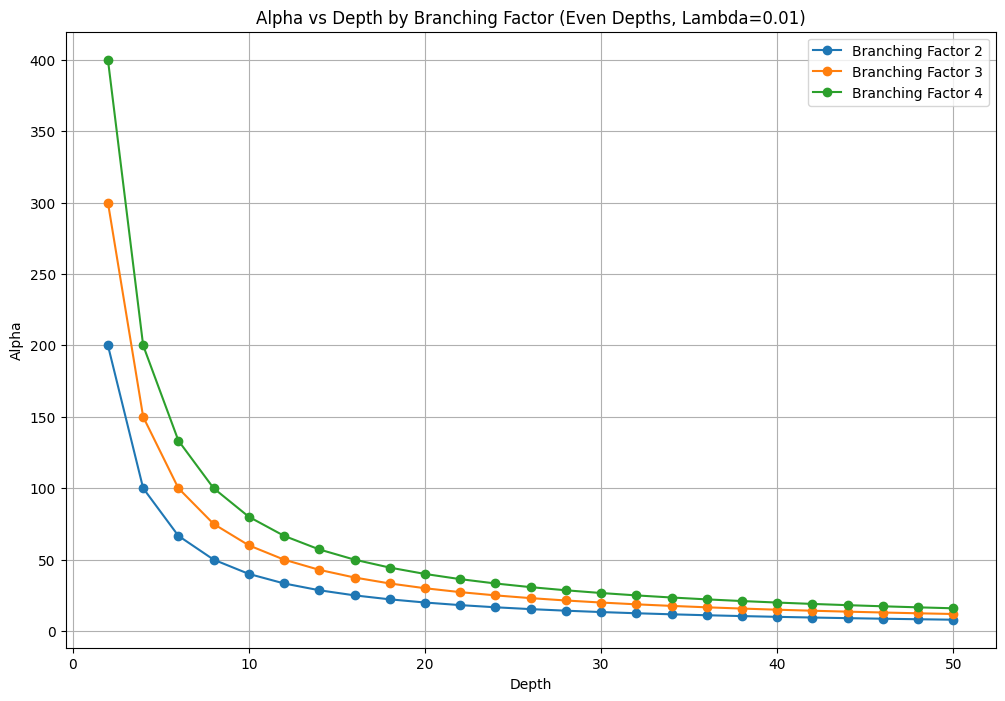

In [21]:
import matplotlib.pyplot as plt

def calculate_alphas_optimized(max_depth, lam, branching_factor):
    """
    점화식을 사용하여 특정 분기 수(branching_factor)에 대한 Alpha 값을 계산
    """
    alphas = []
    # Depth 1 (Leaf/Root only): Alpha = 0.0
    current_alpha = 0.0
    
    # Depth 1은 0이므로 저장하지 않고 계산 시작 (짝수 깊이 비교를 위해 리스트업)
    # 실제 루프는 Depth 2부터 시작
    for depth in range(2, max_depth + 1):
        try:
            val = lam - current_alpha
            if abs(val) < 1e-15:
                # 분모가 0에 가까우면 무한대 처리
                current_alpha = float('inf')
            else:
                # 일반화된 공식: k / (lambda - prev_alpha)
                current_alpha = branching_factor / val
        except ZeroDivisionError:
            current_alpha = float('inf')
            
        # 결과 저장 (depth, alpha)
        alphas.append((depth, current_alpha))
        
    return alphas

# 설정 값
lambda_val = 0.01
max_depth = 50  # 깊이를 50까지 계산
branching_factors = [2, 3, 4] # 비교할 분기 수 리스트

plt.figure(figsize=(12, 8))

# 각 분기 수(2, 3, 4)에 대해 반복
for k in branching_factors:
    all_results = calculate_alphas_optimized(max_depth, lambda_val, k)
    
    # 짝수 깊이만 필터링 (Even depths only)
    even_results = [(d, a) for d, a in all_results if d % 2 == 0]
    
    depths = [d for d, a in even_results]
    values = [a for d, a in even_results]
    
    # 그래프 그리기
    plt.plot(depths, values, marker='o', label=f'Branching Factor {k}')
    
    # 터미널에 일부 값 출력 (확인용)
    print(f"\n=== Branching Factor {k} (Even Depths) ===")
    print(f"Depth  2: {values[0]:.4f}")
    print(f"Depth 10: {values[4]:.4f}")
    print(f"Depth 20: {values[9]:.4f}")

# 그래프 스타일 설정
plt.title(f'Alpha vs Depth by Branching Factor (Even Depths, Lambda={lambda_val})')
plt.xlabel('Depth')
plt.ylabel('Alpha')
plt.legend() # 범례 표시
plt.grid(True)

plt.show()

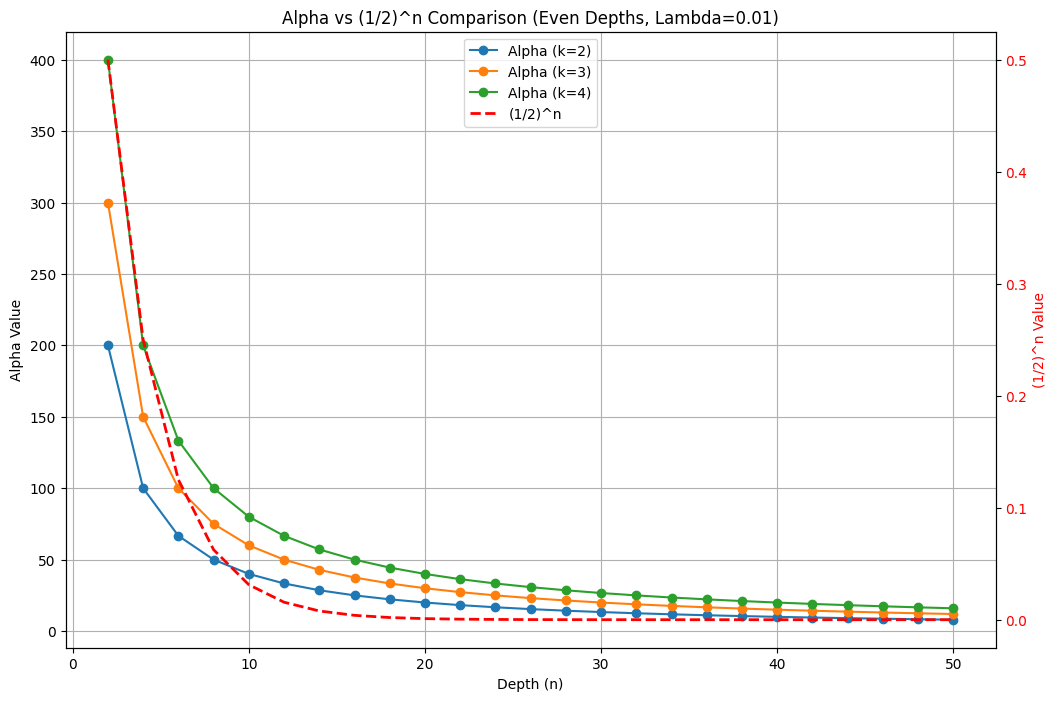

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_alphas_optimized(max_depth, lam, branching_factor):
    alphas = []
    current_alpha = 0.0
    
    # Depth 2부터 max_depth까지 계산
    for depth in range(2, max_depth + 1):
        try:
            val = lam - current_alpha
            if abs(val) < 1e-15:
                current_alpha = float('inf')
            else:
                current_alpha = branching_factor / val
        except ZeroDivisionError:
            current_alpha = float('inf')
            
        alphas.append((depth, current_alpha))
        
    return alphas

# 설정 값
lambda_val = 0.01
max_depth = 50
branching_factors = [2, 3, 4]

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(12, 8))

# 1. Alpha 그래프 그리기 (왼쪽 Y축 사용)
colors = ['tab:blue', 'tab:orange', 'tab:green']
lines = [] # 범례(Legend)를 합치기 위해 라인 객체 저장

for i, k in enumerate(branching_factors):
    all_results = calculate_alphas_optimized(max_depth, lambda_val, k)
    
    # 짝수 깊이만 필터링
    even_results = [(d, a) for d, a in all_results if d % 2 == 0]
    depths = [d for d, a in even_results]
    values = [a for d, a in even_results]
    
    line, = ax1.plot(depths, values, marker='o', color=colors[i], label=f'Alpha (k={k})')
    lines.append(line)

ax1.set_xlabel('Depth (n)')
ax1.set_ylabel('Alpha Value', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

# 2. (1/2)^n 그래프 그리기 (오른쪽 Y축 사용)
ax2 = ax1.twinx()  # x축을 공유하는 두 번째 y축 생성

# x축(depths)은 위에서 마지막에 사용된 것을 그대로 사용 (짝수 2, 4, ... 50)
half_pow_n = [0.5 ** (d/2) for d in depths]

line_pow, = ax2.plot(depths, half_pow_n, color='red', linestyle='--', linewidth=2, label='(1/2)^n')
lines.append(line_pow)

ax2.set_ylabel('(1/2)^n Value', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 두 축의 범례(Legend)를 하나로 합쳐서 표시
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center')

plt.title(f'Alpha vs (1/2)^n Comparison (Even Depths, Lambda={lambda_val})')
plt.show()